In [2]:
#Adapted from DeepLabv3FineTuning

In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
# Load the trained model 
model = torch.load('./GearsModelE5B4/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

### Sample Prediction

In [6]:
# Read  a sample image and mask from the data-set
img = cv2.imread(f'./Gear/Real Images/2resized/Image_2.png').transpose(2,0,1).reshape(1,3,768,1024)
mask = cv2.imread(f'./Gear/Real Images/2resized/Image_2.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.FloatTensor)/255)

(array([2.97000e+02, 2.37900e+03, 5.10900e+03, 1.15080e+04, 2.18430e+04,
        2.18608e+05, 4.60961e+05, 6.17380e+04, 3.76800e+03, 2.21000e+02]),
 array([-0.27209687, -0.22858314, -0.18506941, -0.14155568, -0.09804196,
        -0.05452823, -0.0110145 ,  0.03249923,  0.07601295,  0.11952668,
         0.16304041], dtype=float32),
 <a list of 10 Patch objects>)

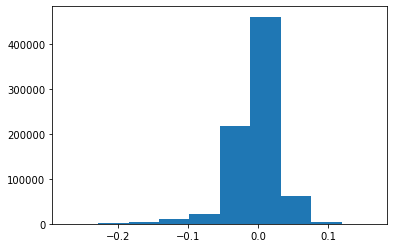

In [7]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

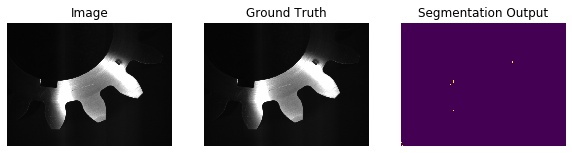

In [11]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.1);
plt.title('Segmentation Output')
plt.axis('off');
#plt.savefig('./AnalysisOutput/SegmentationOutput.png',bbox_inches='tight')